# **Image classification using CNN model to classify image as a cat or a dog**

## **Linking the kaggle directory provided as "kaggle.json".**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


## **Downloading Dataset from Kaggle.**

In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:31<00:00, 33.5MB/s]
100% 1.06G/1.06G [00:31<00:00, 35.9MB/s]


In [ ]:
pip install zipfile36

## **I used zipfile to extract the dataset in main directory.**

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## **I used Dense, Conv2D, MaxPooling2D for the layers and Flatten, BatchNormalization and dropout for normalisation and to mainly reduce overfitting.**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

## **Generators : The operators that load the dataset into batches than loading the complete dataset in one shot, this helps ML model to train the data.**

In [ ]:
# Generators : Image dataset from directory
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


## **def process(image, label) :**
1. The pixel-values of data for a single image ranges from 0 to 255 as we converted the images into a square image, we need to normalise these values from 0-1 so that they fit the activation layers
2. Due to this normalisation, the ReLU and sigmoid activation function can plot the probability of the image being a cat or a dog and range it from 0-1, 0 being a dog and 1 being a cat.
3. The ```map()``` function is used to extract every image at a time from the entire batch, send that image to the process(image, label) function, normalise it and store it back to the ```train_ds``` and ```validation_ds``` respectively

In [ ]:
# Normalisation of values from (0-255) to (0-1)
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

# Map function basically extracts one image from the dataset at a time and sends it to the process function
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)



## **The CNN Model**
- 3 Convolutional Layers :
  1. First Layer - ```32 nodes```.
  2. Second Layer - ```64 nodes```.
  3. Output Layer - ```128 nodes```.
- Type of model : Dense Sequential

In [19]:
model = Sequential()

# Layer 1
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization()) # Added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Layer 2
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization()) # Added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Layer 3
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization()) # Added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1)) # Added to reduce overfitting
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## **Summary :**

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

## **Using Adam as an Optimizer in compilation :**

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## **Fitting the model with 10 epochs**

In [ ]:
history = model.fit(train_ds, epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 62s 87ms/step - loss: 0.5726 - accuracy: 0.6944 - val_loss: 0.4685 - val_accuracy: 0.7720
Epoch 2/10
625/625 [==============================] - 57s 91ms/step - loss: 0.4365 - accuracy: 0.7951 - val_loss: 0.4490 - val_accuracy: 0.7884
Epoch 3/10
625/625 [==============================] - 55s 87ms/step - loss: 0.3161 - accuracy: 0.8626 - val_loss: 0.5052 - val_accuracy: 0.7966
Epoch 4/10
625/625 [==============================] - 56s 88ms/step - loss: 0.1909 - accuracy: 0.9229 - val_loss: 0.6071 - val_accuracy: 0.8038
Epoch 5/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1051 - accuracy: 0.9607 - val_loss: 0.7475 - val_accuracy: 0.7904
Epoch 6/10
625/625 [==============================] - 79s 126ms/step - loss: 0.0682 - accuracy: 0.9746 - val_loss: 0.8848 - val_accuracy: 0.8122
Epoch 7/10
625/625 [==============================] - 60s 95ms/step - loss: 0.0579 - accuracy: 0.9804 - val_loss: 0.9576 - val_accuracy

## **Accuracy v/s Validation Accuracy**

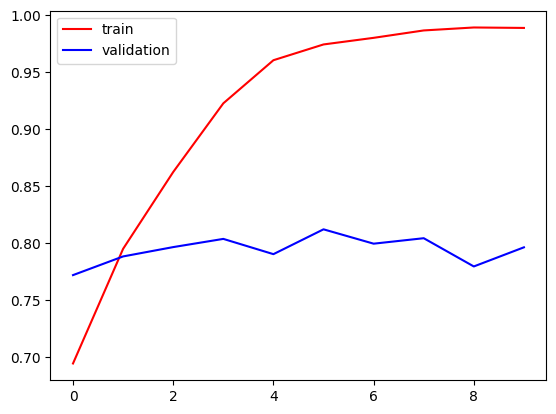

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

# Conclusion : Overfitting - As there is huge postive gap between training data and cross-validation data
# Model gives good results with training data but not with new data

## **Loss v/s Validation Loss**

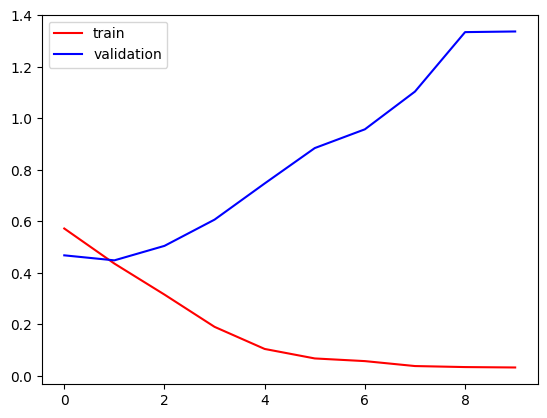

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()
# Conclusion : Overfitting - The same conclusion as above for loss as well.
# Model has less loss for training data but not for new data that is fed.

## **Ways to reduce Overfitting :**
1. Add more data (not recommended, keep as last option).
2. Augment the data (Use existing data to make more data).
3. L1/L2 Regularizer.
4. Dropout.
5. Normalise the batch (it provides the regularisation).
6. Reduce the complexity of the model.

**Note** - In this notebook I have done batch regularisation and the dropout method

In [22]:
history_withnorm = model.fit(train_ds, epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 104ms/step - loss: 1.3234 - accuracy: 0.5903 - val_loss: 0.6747 - val_accuracy: 0.6030
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6021 - accuracy: 0.6780 - val_loss: 0.7104 - val_accuracy: 0.5856
Epoch 3/10
625/625 [==============================] - 75s 120ms/step - loss: 0.5366 - accuracy: 0.7244 - val_loss: 0.5623 - val_accuracy: 0.7234
Epoch 4/10
625/625 [==============================] - 86s 137ms/step - loss: 0.4706 - accuracy: 0.7718 - val_loss: 0.4863 - val_accuracy: 0.7646
Epoch 5/10
625/625 [==============================] - 75s 119ms/step - loss: 0.4211 - accuracy: 0.7954 - val_loss: 0.6438 - val_accuracy: 0.6368
Epoch 6/10
625/625 [==============================] - 71s 113ms/step - loss: 0.3687 - accuracy: 0.8216 - val_loss: 0.5147 - val_accuracy: 0.7372
Epoch 7/10
625/625 [==============================] - 72s 114ms/step - loss: 0.3293 - accuracy: 0.8427 - val_loss: 0.4972 - val_ac

## **Prediction :**

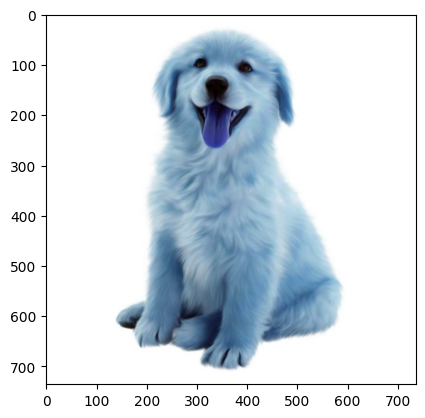

In [43]:
import cv2
dog_test_img = cv2.imread('/content/dog.jpg')
plt.imshow(dog_test_img)

In [44]:
dog_test_img.shape

(736, 736, 3)

In [45]:
dog_test_img = cv2.resize(cat_test_img, (256, 256))

In [46]:
dog_test_input = cat_test_img.reshape((1, 256, 256, 3))

## **Model predicted image to be a dog by passing 0 in the array**

In [47]:
model.predict(dog_test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)